# Single and Multiple Linear Regression

In [1]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Single Linear Regression

In [2]:
#Necessary functions for regression 

#mean squared error
def line_mse_CG(x,y):
    if len(x)!=len(y):
        raise ValueError('arrays are diff lengths')
    def mse(any_slope, any_intercept):
        estimate = any_slope*x + any_intercept
        return (np.mean((y - estimate) ** 2)) 
    return minimize(mse, method="CG") 

#mean absolute error 
def jump_mae(x,y):
    if len(x)!=len(y):
        raise ValueError('arrays are of diff lengths')
    def mae(any_slope, any_intercept):
        estimate = any_slope*x + any_intercept
        return (np.mean(abs(y - estimate)))
    return minimize(mae, method = 'CG') 


### Amazon River Water Levels
The data below contains the high and low water levels of the Amazon River at Iquitos, Peru (in meters). I am analyzing this data to determine if deforestation has resulted in changes in the water balance of the Amazon basin.

In [3]:
#import data
amazon_df = pd.read_csv("amazon.csv")

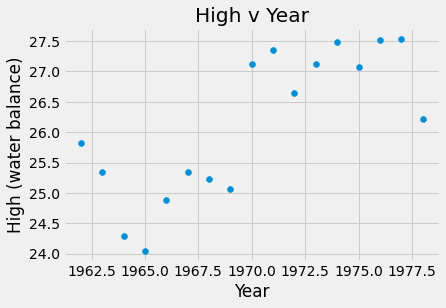

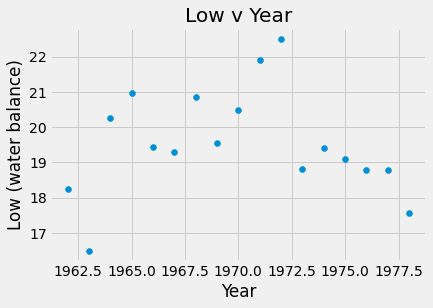

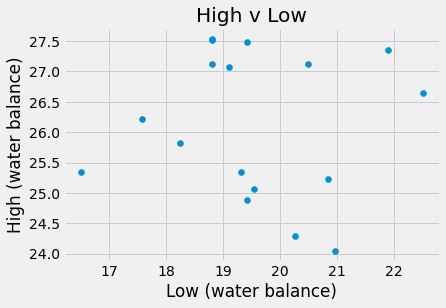

In [4]:
#visualize
plots.scatter(amazon_df.Year, amazon_df.High)
plots.title('High v Year')
plots.xlabel('Year')
plots.ylabel('High (water balance)')
plots.show()

plots.scatter(amazon_df.Year, amazon_df.Low)
plots.title('Low v Year')
plots.xlabel('Year')
plots.ylabel('Low (water balance)')
plots.show()

plots.scatter(amazon_df.Low, amazon_df.High)
plots.title('High v Low')
plots.xlabel('Low (water balance)')
plots.ylabel('High (water balance)')
plots.show()

In [5]:
#calculate least squares regression 
print('High v Year:', line_mse_CG(amazon_df.Year, amazon_df.High))
print('Low v Year:', line_mse_CG(amazon_df.Year, amazon_df.Low))
print('High v Low:', line_mse_CG(amazon_df.Low, amazon_df.High))

High v Year: [ 1.79678158e-01 -3.27840089e+02]
Low v Year: [-1.06430392e-02  4.05262179e+01]
High v Low: [-1.40668020e-02  2.64010212e+01]


The slope for High v Year was 0.17 meters which means that each year, on average, the high water level increased by 0.17 meters. For Low v Year, m = -0.0106 meters, so the low water level was decreasing by 0.0106 meters per year. Finally, the slope of the High v Low water levels was -0.014 meters, thus the high water level decreased by 0.014 meters for each meter increase of the low water level. 

### Triple Jump Distances vs. Vertical Jump Heights

Does skill in one sport imply skill in a related sport? The following data was collected by observing 40 collegiate level soccer players. Distances in both jump activities were measured in centimeters.

In [6]:
#read in the df
jumps_df = pd.read_csv('triple_vertical.csv')

Least squares line: [ 0.09295685 -1.56628095]
Least absolute deviations line: [0.09005728 0.00016413]


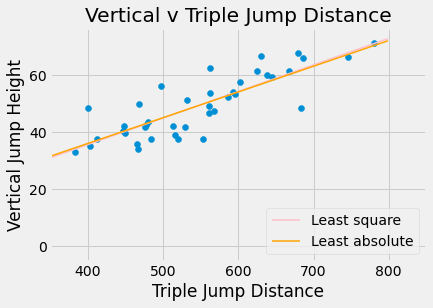

In [7]:
print('Least squares line:', line_mse_CG(jumps_df.triple, jumps_df.vertical))
print('Least absolute deviations line:', jump_mae(jumps_df.triple, jumps_df.vertical))

plots.scatter(jumps_df.triple, jumps_df.vertical)
plots.title('Vertical v Triple Jump Distance')
plots.xlabel('Triple Jump Distance')
plots.xlim(350,850)
plots.ylabel('Vertical Jump Height')
x = np.arange(0,800,1)
yls = -1.56628095+0.09295685*x
yla = 0.00016413+0.09005728*x
plots.plot(x, yls, label = 'Least square', color = 'pink', linewidth = 1.5)
plots.plot(x, yla, label = 'Least absolute', color = 'orange', linewidth = 1.5)
plots.legend(loc = 'lower right')
plots.show()

In [8]:
#creating a regression parameters functions that takes in a data frame and computes the correlation, slope, and intercept
def regression_parameters(df):
    x = df.iloc[:,0]
    stx = (x - np.average(x))/np.std(x, ddof=1)
    y = df.iloc[:,1]
    sty = (y - np.average(y))/np.std(y, ddof=1)
    if len(x)!=len(y):
        raise ValueError('arrays are diff lengths')
    r = sum(stx * sty)/(len(x)-1)
    slope = r * np.std(y, ddof=1)/np.std(x, ddof=1)
    intercept = np.average(y) - slope * np.average(x)
    return make_array(r, slope, intercept)

In [9]:
#applying it to the jumps df
parameters = regression_parameters(jumps_df)
print('r:', parameters.item(0), '; slope:', parameters.item(1), '; intercept:', parameters.item(2))

r: 0.8343076972837594 ; slope: 0.0929572816051218 ; intercept: -1.5665209729634526


### Cryptocurrencies
From a larger datset on [Kaggle](https://www.kaggle.com/jessevent/all-crypto-currencies/data) I chose the two most valuable crpytocurrencies, Bitcoin (BTC) and Ethereum (ETH) from which I obtained two tables called `btc` and `eth`. Each has 5 columns:
* `date`, the date
* `open`, the value of the currency at the beginning of the day
* `close`, the value of the currency at the end of the day
* `market`, the market cap or total dollar value invested in the currency
* `day`, the number of days since the start of our data

In [10]:
btc_df = pd.read_csv('btc.csv')
eth_df = pd.read_csv('eth.csv')

In [11]:
#verifying that dates are the same in both data frames
pd.concat([btc_df.date, eth_df.date], axis = 1).head(5)

,date,date
0,2015-09-29,2015-09-29
1,2015-09-30,2015-09-30
2,2015-10-01,2015-10-01
3,2015-10-02,2015-10-02
4,2015-10-03,2015-10-03


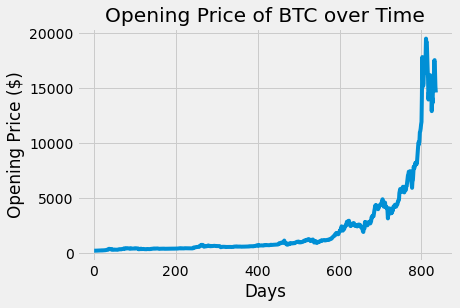

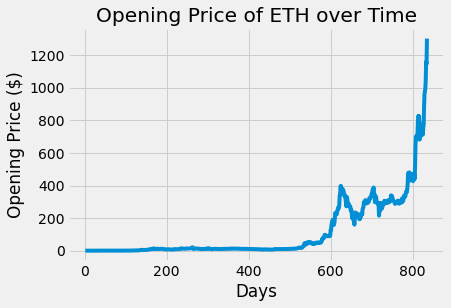

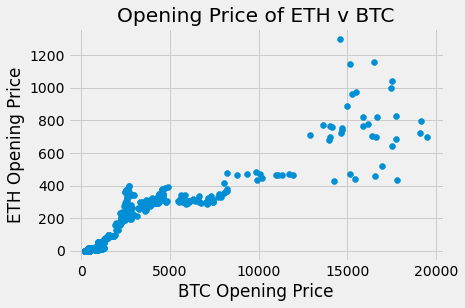

In [12]:
#plots to investigate and visualize the data
plots.plot(btc_df.day, btc_df.open)
plots.title('Opening Price of BTC over Time')
plots.xlabel('Days')
plots.ylabel('Opening Price ($)')
plots.show()

plots.plot(eth_df.day, eth_df.open)
plots.title('Opening Price of ETH over Time')
plots.xlabel('Days')
plots.ylabel('Opening Price ($)')
plots.show()

plots.scatter(btc_df.open, eth_df.open)
plots.title('Opening Price of ETH v BTC')
plots.xlabel('BTC Opening Price')
plots.ylabel('ETH Opening Price')
plots.show()

The opening of price of BTC and ETH over time do appear to be correlated. The plots have a similar increasing trend and general shape even though the actual opening prices are different. 

In [13]:
#calculating the actual correlation
def corr(x, y):
    if len(x)!=len(y):
        raise ValueError('arrays are diff lengths')
    return sum((x - np.average(x))/np.std(x,ddof=1) * (y - np.average(y))/np.std(y,ddof=1))/(len(x)-1)

corr(btc_df.open, eth_df.open)

0.9250325764148283

In [14]:
#predicting ETH price from BTC
def eth_predictor(btc_price):
    btc_eth_op_df = pd.concat([btc_df.open, eth_df.open], axis = 1)
    parameters = regression_parameters(btc_eth_op_df)
    slope = parameters.item(1)
    intercept = parameters.item(2)
    return intercept + slope*btc_price

eth_predictor(btc_df.open)

0       14.178238
1       14.058354
2       14.026117
3       14.089585
4       14.086562
          ...    
830    881.730865
831    885.015087
832    832.069588
833    763.942115
834    736.983280
Name: open, Length: 835, dtype: float64

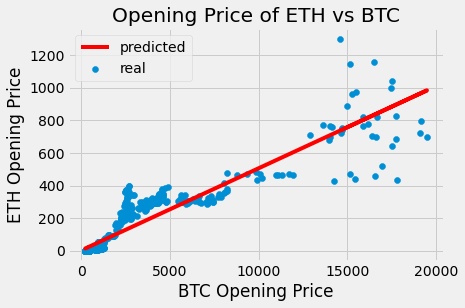

In [15]:
plots.scatter(btc_df.open, eth_df.open, label = 'real')
plots.title('Opening Price of ETH vs BTC')
plots.xlabel('BTC Opening Price')
plots.ylabel('ETH Opening Price')
predicted = eth_predictor(btc_df.open)
plots.plot(btc_df.open, predicted, label = 'predicted', color = 'red')
plots.legend()
plots.show()

Based on the plot above, I am more confident making predictions for lower opening prices of BTC since the real (blue) points are closer to the predicted (red) line. Although, the predicted ETH opening price below a BTC opening price of 5000 may consistently be underpredicted. Furthermore, the real prices of ETH are much more scattered at BTC prices over 15000. In general, the original scatter plot has much less spread at lower opening prices, and after about 12000 the points start fanning out and they become more scattered. Overall, if a plot of residuals was created, it is unlikely to look like a 'shapeless cloud' which means that the linear fit is unreasonable. 

## Multiple Linear Regression

The data below contains the following variables for 1,174 mother-baby pairs: the baby’s birth weight in ounces, the number of gestational days, the mother’s age in completed years, the mother’s height in inches, pregnancy weight in pounds, and whether or not the mother smoked during pregnancy.

In [16]:
baby_df = pd.read_csv("baby.csv")

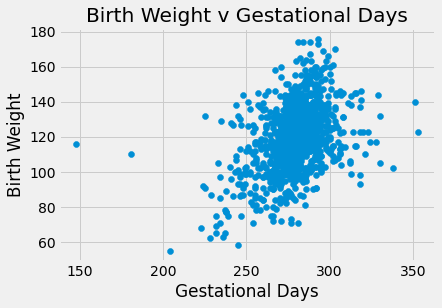

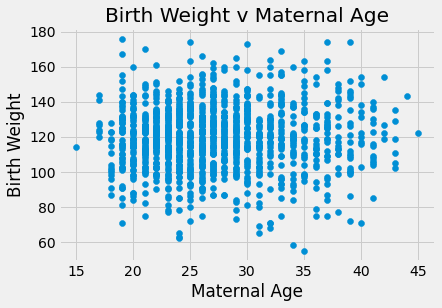

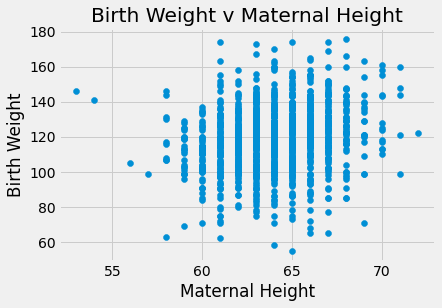

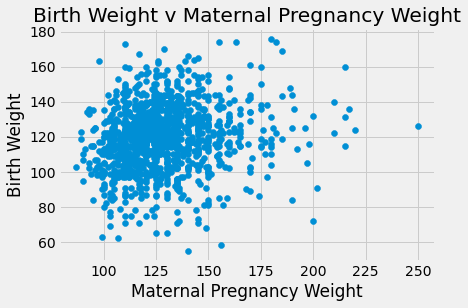

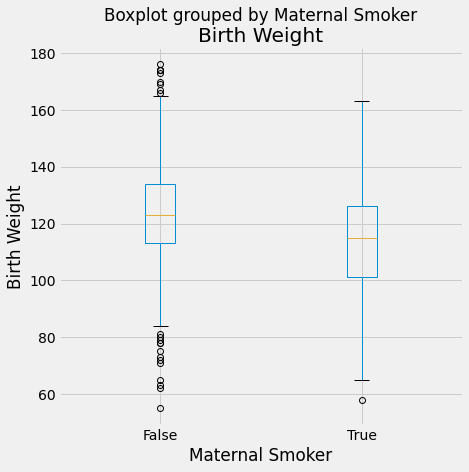

In [17]:
#visualize the data
plots.scatter(baby_df.iloc[:,1], baby_df.iloc[:,0])
plots.title('Birth Weight v Gestational Days')
plots.xlabel('Gestational Days')
plots.ylabel('Birth Weight')
plots.show()

plots.scatter(baby_df.iloc[:,2], baby_df.iloc[:,0])
plots.title('Birth Weight v Maternal Age')
plots.xlabel('Maternal Age')
plots.ylabel('Birth Weight')
plots.show()

plots.scatter(baby_df.iloc[:,3], baby_df.iloc[:,0])
plots.title('Birth Weight v Maternal Height')
plots.xlabel('Maternal Height')
plots.ylabel('Birth Weight')
plots.show()

plots.scatter(baby_df.iloc[:,4], baby_df.iloc[:,0])
plots.title('Birth Weight v Maternal Pregnancy Weight')
plots.xlabel('Maternal Pregnancy Weight')
plots.ylabel('Birth Weight')
plots.show()

baby_df.boxplot(by = 'Maternal Smoker', column = 'Birth Weight', figsize=(7,7)) 
plots.ylabel('Birth Weight')
plots.show()

There appears to be a positive linear relationship in Birth Weight v Gestational days. The Birth Weight v Maternal Age looks like a shapeless cloud/there does not appear to be a discernable trend. The Birth Weight v Maternal Height plot also does not appear to have much of a trend/maybe slightly positive, but the points are generally more on the right side of the plot. The Birth Weight v Maternal Pregnancy weight also does not seem to have a trend/maybe slightly positive. The box plot shows that non smoking mothers have a a larger spread in birth weight (more outliers). The average birth weight for a non smoking mother is greater (about 123 oz) than that of smoking mothers (about 115 oz). 

In [18]:
#Functions for linear regression and calculating confidence intervals through bootstrapping 
def lin_reg(x, y):
    stx = (x - np.average(x))/np.std(x, ddof=1)
    sty = (y - np.average(y))/np.std(y, ddof=1)
    if len(x)!=len(y):
        raise ValueError('arrays are diff lengths')
    r = sum(stx * sty)/(len(x)-1)
    m = r * np.std(y, ddof=1)/np.std(x, ddof=1)
    intercept = np.average(y) - m * np.average(x)
    print ('intercept: ', intercept)
    print('slope: ', m)
    
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)  

def correlation(x, y):
    x_in_standard_units = standard_units(x)
    y_in_standard_units = standard_units(y)
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return sum(x_in_standard_units * y_in_standard_units)/(len(x)-1)

def slope(x, y):
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return  correlation(x, y)* np.std(y,ddof=1)/np.std(x,ddof=1)

def bootstrap_slope(df, x, y, repetitions):
    n = df.shape[0]
    slopes = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = df.sample(n,replace=True)
        
        bootstrap_slope = slope(bootstrap_sample[x], bootstrap_sample[y])
        slopes = np.append(slopes, bootstrap_slope)
    
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    print('95% CI: ', left, 'to', right)

In [19]:
#Gestational Days (as the predictor) and Birth Weigth (as the response)
lin_reg(baby_df.iloc[:,1], baby_df.iloc[:,0])
bootstrap_slope(baby_df, 'Gestational Days', 'Birth Weight', 100)

intercept:  -10.754138914450422
slope:  0.4665568769492159
95% CI:  0.3808786500149332 to 0.5576701395660186


The slope is 0.47 which means that for every additional gestational day, the birth weight increases by 0.47 ounces. The predictor is significant based on the 95% confidence interval constructed because the interval does not contain 0. Overall, it does make sense for birth weight to be associated with gestational age since the more time the baby spends in gestation the more it can grow. 


In [20]:
#Maternal Age (as the predictor) and Birth Weigth (as the response)
lin_reg(baby_df.iloc[:,2], baby_df.iloc[:,0])
bootstrap_slope(baby_df, 'Maternal Age', 'Birth Weight', 100)

intercept:  117.14790872185156
slope:  0.08500766941582519


95% CI:  -0.10253454984661929 to 0.33513511367838705


The slope is 0.085 which means that for every unit increase (year) in maternal age, the birth weight increases by 0.085 ounces. Based on the 95% CI the predictor cannot be claimed as significant because the interval contains 0. Overall, it does not make sense for the mother's age to be strongly associated with the birth weight. 

In [21]:
#Maternal Height (as the predictor) and Birth Weigth (as the response)
lin_reg(baby_df.iloc[:,3], baby_df.iloc[:,0])
bootstrap_slope(baby_df, 'Maternal Height', 'Birth Weight', 100)

intercept:  24.796263075888632
slope:  1.478019351928435


95% CI:  1.017913073717885 to 1.9222457421309356


The slope is 1.48 which indicates that a unit increase (inch) in the maternal height increases the birth weight by 1.48 ounces. Based on the 95% CI, this predictor is significant because 0 is not within the intercal. This means there is evidence to reject the null, thus the slope is different than 0. The results do seem to make sense, a taller mother is naturally larger and therefore, genetically, may have a larger baby. 


In [22]:
#Maternal Smoker (as the predictor) and Birth Weigth (as the response)
baby_01_df = baby_df.iloc[:,5].astype(int)
lin_reg(baby_01_df, baby_df.iloc[:,0])
bootstrap_slope(baby_df, 'Maternal Smoker', 'Birth Weight', 100)

intercept:  123.08531468531473
slope:  -9.266142572025034


95% CI:  -11.32968087300379 to -7.185150051741967


The slope is -9.27 which means that the baby weight decreases by 9.27 ounces from non smoking mother (0) to a smoking mother (1). This predictor is significant based on the 95% CI constructed because a slope of 0 is not found in the intervel, and thus providing evidence that the slope is different than 0. The results do make sense because it is known that drugs are bad during pregnancy, and therefore can harm the baby's health resulting in a smaller/less healthy baby potentially. 

### Fitting a multiple linear regression with four predictors: Gestational Days, Maternal Smoking, Maternal Height and Maternal Pregagncy Weight.

In [23]:
#residual sum of squares function
def rss(n0,n1,n2,n3, n4):
    estimate = n0+n1*baby_df['Gestational Days']+n2*baby_df['Maternal Height']\
    +n3*baby_df['Maternal Pregnancy Weight']+n4*baby_01_df
    return (np.mean((baby_df['Birth Weight'] - estimate) ** 2))

mlr = minimize(rss,method="CG")
print('int:', mlr[0])
print('coeff gestational days:', mlr[1])
print('coeff maternal height:', mlr[2])
print('coeff maternal pregnancy weight:', mlr[3])
print('coeff maternal smoker:', mlr[4])

int: -52.64701171647796
coeff gestational days: 0.41050879724525
coeff maternal height: 0.8149417122726399
coeff maternal pregnancy weight: 0.0672408102898637
coeff maternal smoker: -8.371743326991718


### Creating and comparing multiple linear regression models

In [24]:
# using the residual sum of squares
n = 100
predicted = make_array()
    
for i in range(n):
    partial_df = baby_df.drop(i)

    def rss(n0,n1,n2,n3, n4):
        estimate = n0+n1*baby_df['Gestational Days']+n2*baby_df['Maternal Height']\
        +n3*baby_df['Maternal Pregnancy Weight']+n4*baby_01_df
        return (np.mean((baby_df['Birth Weight'] - estimate) ** 2))

    partial_mlr = minimize(rss,method="CG")

    partial_pred = partial_mlr[0]+partial_mlr[1]*baby_df['Gestational Days'][i] \
        +partial_mlr[2]*baby_df['Maternal Height'][i] + partial_mlr[3]*baby_df['Maternal Pregnancy Weight'][i]\
        +partial_mlr[4]*baby_01_df[i]

    predicted = np.append(predicted, partial_pred)

In [ ]:
mean_dev = np.mean(abs(baby_df['Birth Weight'][0:len(predicted)]-predicted))
mean_rel_error = np.mean(abs(baby_df['Birth Weight'][0:len(predicted)]-predicted)\
                         /baby_df['Birth Weight'][0:len(predicted)])
print('mean deviation:', mean_dev)
print('mean relative error:', mean_rel_error)

In [ ]:
#using the sklearn linear regression
from sklearn.linear_model import LinearRegression
X = baby_df[['Gestational Days', 'Maternal Height', 'Maternal Smoker']]
Y = baby_df['Birth Weight']

regress = LinearRegression()  
regress.fit(X, Y)

n = 100
predicted_lr = make_array()
    
for i in range(n):
    regress = LinearRegression()  
    regress.fit(X.drop(i), Y.drop(i))
    
    lr_pred=regress.predict(X.iloc[[i]])
    
    predicted_lr = np.append(predicted, lr_pred)

In [ ]:
mean_dev = np.mean(abs(baby_df['Birth Weight'][0:len(predicted_lr)]-predicted_lr))
mean_rel_error = np.mean(abs(baby_df['Birth Weight'][0:len(predicted_lr)]-predicted_lr)\
                         /baby_df['Birth Weight'][0:len(predicted_lr)])
print('mean deviation:', mean_dev)
print('mean relative error:', mean_rel_error)

The models performed similarily, although the mean relative error was just barely smaller for the second model which excluded the maternal pregnancy weight.  Also, the sklearn linear regression is much faster computationally. 